1. Your views about the problem statement?
This is the Regression problem. Model needs to predict salary using other features. 
Dependent variable : CTC
Independent variable:College,City,Role,Previous CTC,Previous job change, Graduation Marks,EXP (Month)
Dataset size is small to get the good accuracy. 
Most of the variables show low correlation with CTC. 
Only variable Role,previous CTC, and experience shows significant relationship with the CTC.
CTC data is skewed.
The feature 'Previous job change' may be used to predict churn of an employee.


2. What will be your approach to solving this task?
i)First step is to check for NULL values in the dataset. In this dataset I did not observe any null values. Null values may have been replaced wirh mean if it is numerical or may have been deleted if it is categorical (if their are few NULL entries).
ii)Second step is convert all categorical varibales into numerical values.Here I have directly converted College,Role,City into numbers. However, the function Pandas get_dummies() can also be used for the same purpose.
iii)Next step is to check whether data features are balanced or not. using discribe() function we can obeserve that mean and median are very much similar. And also verious percentile values are consistant. However, the Skew function shows that CTC feature is poitivly skewed.
iV)Next step is to find the corelation and multicolinearity. Role,previous CTC, and experience shows significant relationship with the CTC. College,City,Previous job change and Graduation Marks,EXP shows very less corelation with CTC and may be dropped. From the domain knowledge perspective, Graduation Marks and EXP significanyly contribute in salary. Hence, I did not drop.
v)Next is to divide dataset into training and testing set. We have used 80/20 ratio for this.
vi)Next is to identify set of regression models which can be applied.
vii)Next is to train the regresson model with the training set and evaluation using test set. Compute RMS, R2 score  for test data.
viii)Next is to train model using reduced feature set(after deleting unimportant features having multicolinearity or low coretion with dependent variable) 
ix)Select model giving least RMS or high R2 score.
x)Predict salary using this model.

3. What were the available ML model options you had to perform this task?
All the regression models like multiple linear regression, Lasso , ridge regression and various tree based modes(random forest,bagging, boosting) can be used for such types of problems. I have solved by applying all the models and identified best one.
4. Which model’s performance is best and what could be the possible reason for that?
XGboost is giving the best performance(Although Random Forest values are best,I am skipping Random Forest.Tehnically it does not work well for the skewed data and CTC is postive skewed also takes lot of of time). 
XGboost works well even for the skewed data against the other ensebling techniques.
Regression Tree gives better results than OLS method for miltiple linear regression.Too many features complicate things in OLS regression which is not the case in Trees. 
Ensemble techniques combines results of multiple regression tree.
Boosting is also an ensemble technique, which combines many models to give a final one. However, in enseble trees are trained seperately.Boosting trains models in sequence. This means, every new model is trained to correct the error of the previous model and the sequence got stopped when there is no further improvement. That is why it is more accurate.
We can observe that graduation marks and eductaion become more importnat features than Role against what corelation matrix shows. 
5. What steps can you take to improve this selected model’s performance even further?
CTC data is skeved. If we could reduce skevness by using normalization, selected model peformance may improve.
Performance of the model can be improves by using Larger dataset.
Also the number of independent features is less. More corealted features such as language skills, technical certifications,technical test score, education level(UG,masters,PhD),sector,age, etc can be used for predicting salary.


In [23]:
#load common liabraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [24]:
#load dataset
cities=pd.read_csv("C:/archana/internshala/python/project/cities.csv")
colleges=pd.read_csv("C:/archana/internshala/python/project/Colleges.csv")
df=pd.read_csv("C:/archana/internshala/python/project/ML case Study.csv")

In [25]:
#check for null values
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [26]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes


In [27]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 804.0+ bytes


In [28]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [29]:
#Replace cities with metro(1) and non_metro(0)
Metro=list(cities['Metrio City'])
NonMetro=list(cities['non-metro cities'])
for city in df.City:
    if city in Metro:
        df['City'].replace(city,1,inplace=True)
    elif city in NonMetro:
              df['City'].replace(city,0,inplace=True)
df.head()              


#Replace college name to Tier1, Tier2, Tier3
Tier1=list(colleges['Tier 1'])
Tier2=list(colleges['Tier 2'])
Tier3=list(colleges['Tier 3'])

for college in df.College:
    if college in Tier1:
        df['College'].replace(college,1,inplace=True)
    elif college in Tier2:
              df['College'].replace(college,2,inplace=True)
    elif college in Tier3:
              df['College'].replace(college,3,inplace=True)

#Replace Roles with 0 and 1, 1 for Manager, 0 for Executive
for role in df.Role:
    if role == 'Manager':
        df['Role'].replace(role,1,inplace=True)
    elif role == 'Executive':
        df['Role'].replace(role,0,inplace=True)
            
df.head()              


,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,1,55523.0,3,66,19,71406.58
1,2,0,0,57081.0,1,84,18,68005.87
2,3,0,0,60347.0,2,52,28,76764.02
3,3,0,0,49010.0,2,81,33,82092.39
4,1,0,0,57879.0,4,74,32,73878.10


In [30]:
#univariate Analysis
df.describe()
#Not much difference between mean and median of Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,0.206419,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,0.404862,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,0.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,0.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [31]:
#check skewness in data
df.skew(axis = 0, skipna = True)
#target variable CTC is positive skewed

College                0.046230
City                  -0.056716
Role                   1.452103
Previous CTC           0.150418
Previous job change   -0.054173
Graduation Marks       0.011692
EXP (Month)            0.079202
CTC                    1.091988
dtype: float64

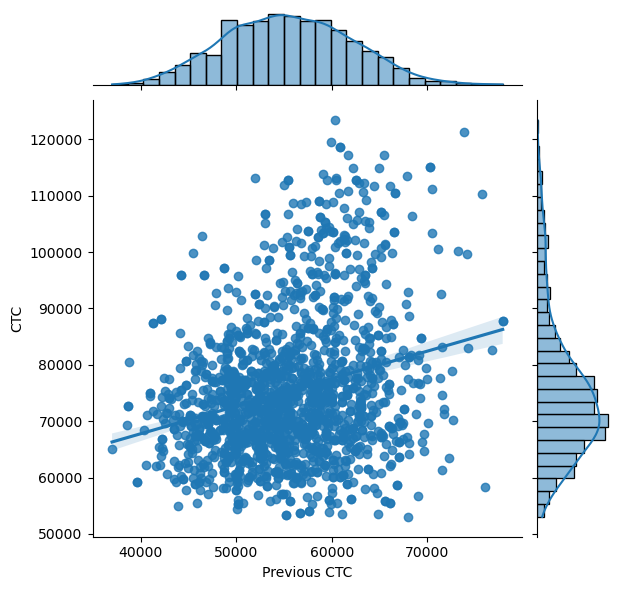

In [32]:
#check outliers Previous CTC
sns.jointplot(x='Previous CTC',y='CTC',data=df,kind='reg')

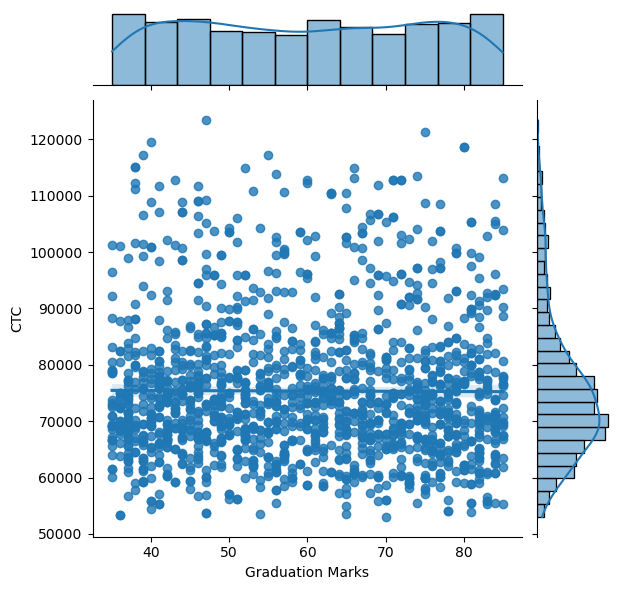

In [33]:
#check outliers Graduation Marks
sns.jointplot(x='Graduation Marks',y='CTC',data=df,kind='reg')

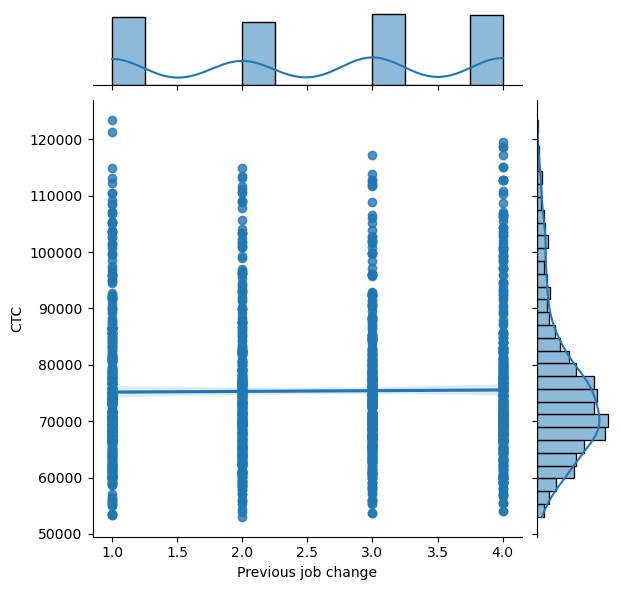

In [34]:
#check outliers Previous job change
sns.jointplot(x='Previous job change',y='CTC',data=df,kind='reg')

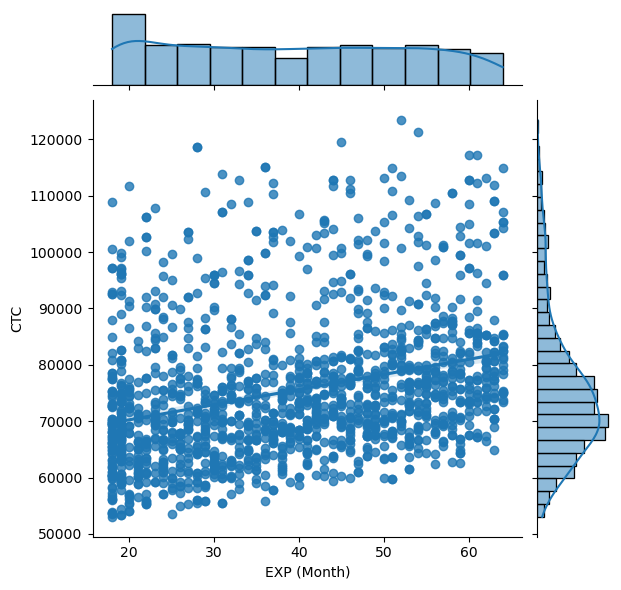

In [35]:

#check outliers Previous EXP (Month)
sns.jointplot(x='EXP (Month)',y='CTC',data=df,kind='reg')

<Axes: xlabel='College', ylabel='count'>

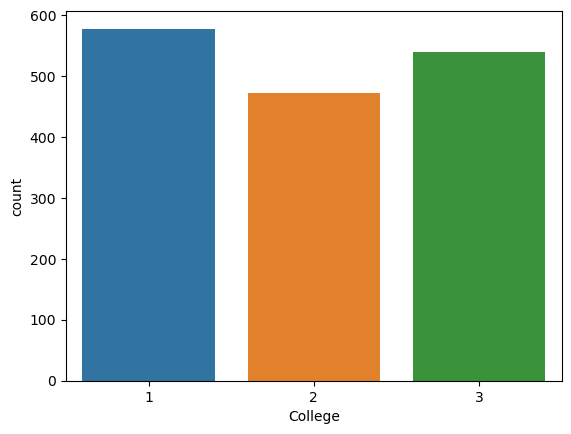

In [36]:
sns.countplot(x='College',data=df)

<Axes: xlabel='City', ylabel='count'>

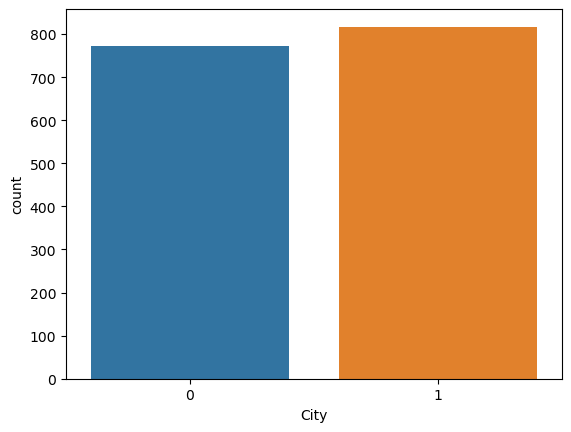

In [37]:
sns.countplot(x='City',data=df)

<Axes: xlabel='Role', ylabel='count'>

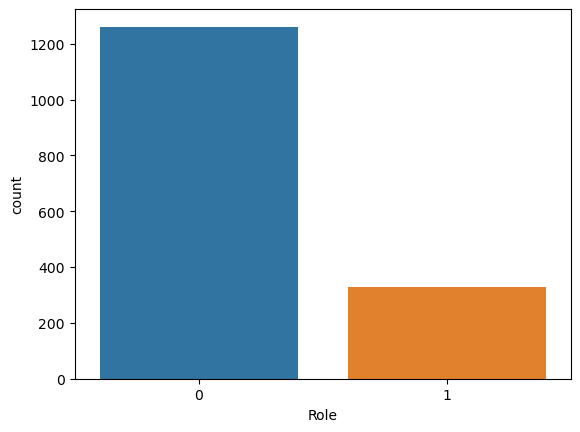

In [38]:
sns.countplot(x='Role',data=df)
# very few entries of Manager.ROle is not balanced.

In [39]:
#find corelations and multicolinearity
df.corr()
#could not find very high correlation with CTC, Role, experience and previous ctc shows better corelation with CTC


,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
College,1.000000,-0.014946,-0.014749,0.041979,-0.055060,0.003539,0.011752,-0.029592
City,-0.014946,1.000000,-0.048671,0.004644,0.051670,-0.018616,-0.023613,-0.020365
Role,-0.014749,-0.048671,1.000000,0.012321,-0.017150,0.017858,-0.026751,0.621311
Previous CTC,0.041979,0.004644,0.012321,1.000000,0.005756,-0.032976,0.119163,0.258000
Previous job change,-0.055060,0.051670,-0.017150,0.005756,1.000000,0.019267,0.023488,0.011370
Graduation Marks,0.003539,-0.018616,0.017858,-0.032976,0.019267,1.000000,-0.057061,-0.005450
EXP (Month),0.011752,-0.023613,-0.026751,0.119163,0.023488,-0.057061,1.000000,0.301115
CTC,-0.029592,-0.020365,0.621311,0.258000,0.011370,-0.005450,0.301115,1.000000


In [41]:
#check for P values using statsmodel
# P value for Role, previous CTC,Exp, College are less than 0.05 so they are highly significant.
# Previous CTC, experience are most significant
import statsmodels.api as sm
x1=df.drop('CTC',axis=1)
x1_const=sm.add_constant(x1)
y1=df['CTC']
s2=sm.OLS(y1.astype(float),x1_const.astype(float)).fit()
s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          4.70e-257
Time:                        01:32:54   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Role                 1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#check using sklearn
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(x1,y1)
print(lr2.intercept_,lr2.coef_)
#statsmodel and linera regression are giving allmost same beta values

38421.109806894296 [-4.81514705e+02  3.80830787e+02  1.94874279e+04  4.10090279e-01
  1.26565295e+02  6.23621203e+00  2.61344394e+02]


In [44]:
#Initialize list for storing results as modell name, R2 Score nad RMS values
Model=[]
RMS=[]
R2_score=[]


In [46]:
#Divide samples into training and test data. 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x1,y1,test_size=0.2,random_state=0)
from sklearn.metrics import mean_squared_error


# Multiple Linear Regression

In [48]:
lm2=LinearRegression()
lm2.fit(xtrain,ytrain)
from sklearn.metrics import r2_score
print('Training Mean Squared Error =',mean_squared_error(ytrain,lm2.predict(xtrain)))
print('Test Mean Squared Error =',mean_squared_error(ytest,lm2.predict(xtest)))
print('Training R2_score =',r2_score(ytrain,lm2.predict(xtrain)))
print('Test R2_score =',r2_score(ytest,lm2.predict(xtest)))
Model.append('Linear Regression')
RMS.append(mean_squared_error(ytest,lm2.predict(xtest)))
R2_score.append(r2_score(ytest,lm2.predict(xtest)))

Training Mean Squared Error = 75086299.73658578
Test Mean Squared Error = 68909870.69952625
Training R2_score = 0.5331293335456955
Test R2_score = 0.5355989894790048


# Ridge Regression

In [49]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge
scaler = preprocessing.StandardScaler().fit(xtrain)
X_train_s = scaler.transform(xtrain)
X_test_s = scaler.transform(xtest)
lm_ridge = Ridge(alpha=0.5)
lm_ridge.fit(X_train_s, ytrain)
print('Test R2_score = ',r2_score(ytest,lm_ridge.predict(X_test_s)))
print('Test Mean Squared Error = ',mean_squared_error(ytest,lm_ridge.predict(X_test_s)))

Test R2_score =  0.5355848845406526
Test Mean Squared Error =  68911963.65250449


In [50]:
#find best value of alpha
from sklearn.model_selection import validation_curve
param_range = np.logspace(-2, 8, 100)
train_score, test_score = validation_curve(Ridge(), xtrain, ytrain,
                                           param_name="alpha",
                                           param_range=param_range,
                                           scoring="r2")
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
print("Max Test R2_score = ", max(test_mean))

Max Test R2_score =  0.52582118125153


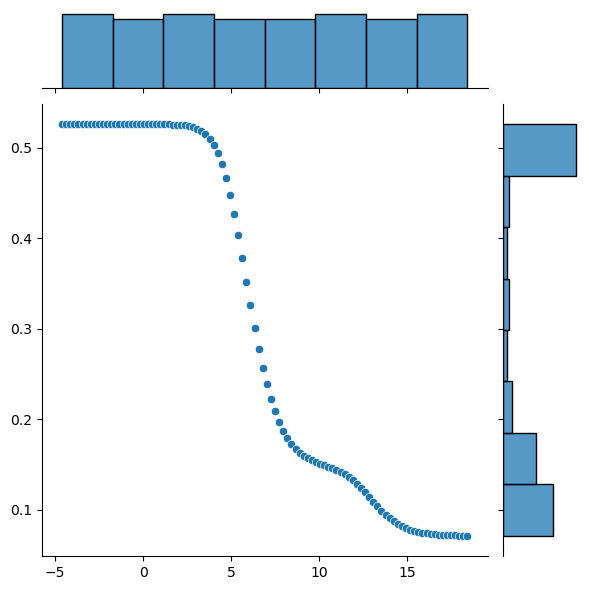

In [51]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [52]:
best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha = ", selected_alpha)
lm_ridge_best = Ridge(alpha=selected_alpha)
lm_ridge_best.fit(X_train_s, ytrain)
print('Test R2_score = ',r2_score(ytest,lm_ridge_best.predict(X_test_s)))
print('Test Mean Squared Error = ',mean_squared_error(ytest,lm_ridge_best.predict(X_test_s)))
Model.append('Ridge Regression')
RMS.append(mean_squared_error(ytest,lm_ridge_best.predict(X_test_s)))
R2_score.append(r2_score(ytest,lm_ridge_best.predict(X_test_s)))


Selected Alpha =  0.41320124001153363
Test R2_score =  0.5355873428938388
Test Mean Squared Error =  68911598.87121342


# lasso Regression

In [53]:
from sklearn.linear_model import Lasso
train_score, test_score = validation_curve(Lasso(), xtrain, ytrain, param_name="alpha", param_range=param_range, scoring="r2")
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha = ", selected_alpha)
lm_lasso_best = Lasso(alpha=selected_alpha)
lm_lasso_best.fit(X_train_s, ytrain)
print('Test R2_score = ',r2_score(ytest,lm_lasso_best.predict(X_test_s)))
print('Test Mean Squared Error = ',mean_squared_error(ytest,lm_lasso_best.predict(X_test_s)))
Model.append('Lasso Regression')
RMS.append(mean_squared_error(ytest,lm_lasso_best.predict(X_test_s)))
R2_score.append(r2_score(ytest,lm_lasso_best.predict(X_test_s)))


Selected Alpha =  8.497534359086439
Test R2_score =  0.5357073696946963
Test Mean Squared Error =  68893788.76499017


# Regressor Decision Tree

In [54]:
from sklearn import tree
reg_tree=tree.DecisionTreeRegressor(max_depth=3)
reg_tree.fit(xtrain,ytrain)
print('Test R2_score = ',r2_score(ytest,reg_tree.predict(xtest)))
print('Test Mean Squared Error = ',mean_squared_error(ytest,reg_tree.predict(xtest)))
Model.append('Decision Tree Regression')
RMS.append(mean_squared_error(ytest,reg_tree.predict(xtest)))
R2_score.append(r2_score(ytest,reg_tree.predict(xtest)))


Test R2_score =  0.5927831611924911
Test Mean Squared Error =  60424631.02613475


# Decision Tree Bagging

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
reg_tree=tree.DecisionTreeRegressor()
from sklearn.ensemble import BaggingRegressor
param_grid_bagging = {
    'n_estimators': [100, 250, 500, 1000],
    'max_samples': [0.5, 0.7, 0.8],
    'max_features': [0.5, 0.7, 0.8]
}

grid_search_bagging = GridSearchCV(estimator=BaggingRegressor(estimator=reg_tree, random_state=42),
                                   param_grid=param_grid_bagging,
                                   scoring='r2',
                                   n_jobs=-1,
                                   cv=5)
grid_search_bagging.fit(xtrain, ytrain)
best_bag_tree = grid_search_bagging.best_estimator_
print('Test R2_score = ',r2_score(ytest,best_bag_tree.predict(xtest)))
print('Test Mean Squared Error = ',mean_squared_error(ytest,best_bag_tree.predict(xtest)))
Model.append('Decision Tree Regression with Bagging')
RMS.append(mean_squared_error(ytest,best_bag_tree.predict(xtest)))
R2_score.append(r2_score(ytest,best_bag_tree.predict(xtest)))


Test R2_score =  0.6029001006531672
Test Mean Squared Error =  58923434.91691869


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_reg= RandomForestRegressor(n_estimators=1000, random_state=42)
params_grid = {
    "max_features": [4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 10]
}
grid_search = GridSearchCV(rf_reg, params_grid, n_jobs=-1, cv=5, scoring='r2')
grid_search.fit(xtrain, ytrain)
best_rf_reg = grid_search.best_estimator_
print('Test R2_score = ',r2_score(ytest,best_rf_reg.predict(xtest)))
print('Test Mean Squared Error = ',mean_squared_error(ytest,best_rf_reg.predict(xtest)))
Model.append('Random Forest')
RMS.append(mean_squared_error(ytest,best_rf_reg.predict(xtest)))
R2_score.append(r2_score(ytest,best_rf_reg.predict(xtest)))



Test R2_score =  0.6630644400192874
Test Mean Squared Error =  49995984.81987734


# Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid_gbr = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5]
}
grid_search_gbr = GridSearchCV(estimator=GradientBoostingRegressor(),
                                param_grid=param_grid_gbr,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)
grid_search_gbr.fit(xtrain, ytrain)
best_gbr_model = grid_search_gbr.best_estimator_
print('Test R2_score = ',r2_score(ytest,best_rf_reg.predict(xtest)))
print('Test Mean Squared Error = ',mean_squared_error(ytest,best_gbr_model.predict(xtest)))
Model.append('Gradient Boosting')
RMS.append(mean_squared_error(ytest,best_gbr_model.predict(xtest)))
R2_score.append(r2_score(ytest,best_gbr_model.predict(xtest)))



Test R2_score =  0.6630644400192874
Test Mean Squared Error =  57549125.269158944


# Adaboost Regressor

In [58]:
from sklearn.ensemble import AdaBoostRegressor
param_grid_adaboost = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_adaboost = GridSearchCV(estimator=AdaBoostRegressor(),
                                param_grid=param_grid_adaboost,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)
grid_search_adaboost.fit(xtrain, ytrain)
best_adaboost_model = grid_search_adaboost.best_estimator_
print('Test R2_score',r2_score(ytest,best_adaboost_model.predict(xtest)))
print('Test Mean Squared Error',mean_squared_error(ytest,best_adaboost_model.predict(xtest)))
Model.append('Adaboost Regressor')
RMS.append(mean_squared_error(ytest,best_adaboost_model.predict(xtest)))
R2_score.append(r2_score(ytest,best_adaboost_model.predict(xtest)))



Test R2_score 0.6103846457159061
Test Mean Squared Error 57812845.10157891


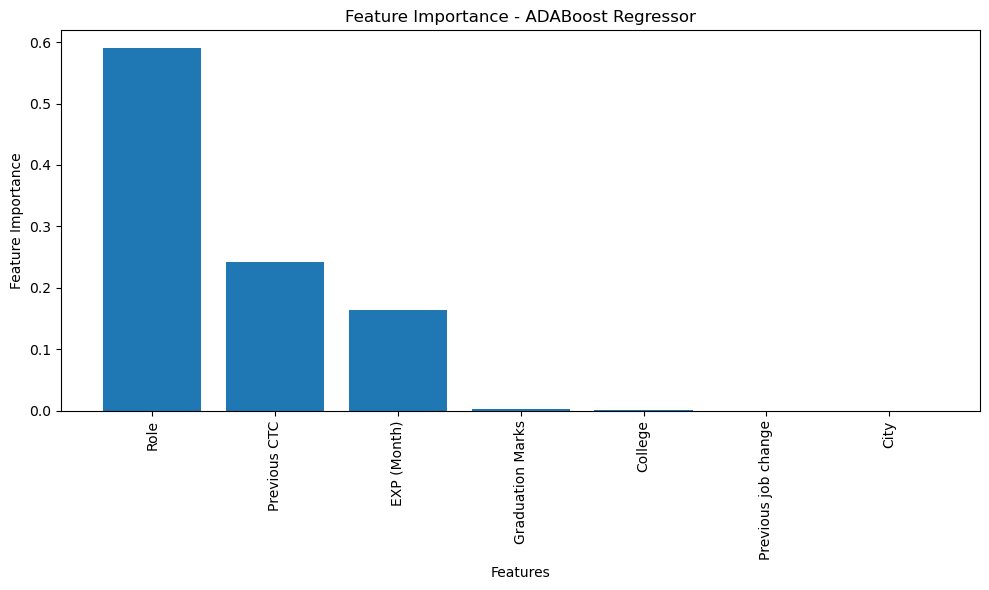

In [59]:
#plot important features
feature_importances = best_adaboost_model.feature_importances_
feature_names = xtrain.columns
sorted_idx = feature_importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(xtrain.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(xtrain.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - ADABoost Regressor")
plt.tight_layout()
plt.show()


# XGboost Regressor

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.3, 'max_depth': 9, 'reg_alpha': 1, 'subsample': 0.9}
Test R2_score =  0.6542547593576358
Test Mean Squared Error =  51303204.10137174


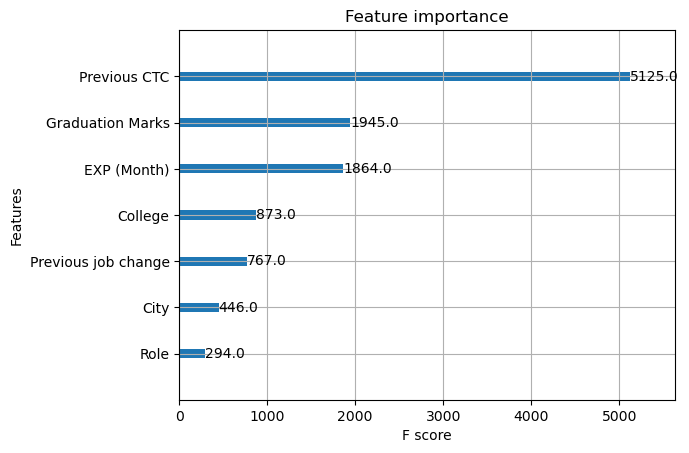

In [60]:
#plot important features
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, n_jobs=-1)
xgb_reg.fit(xtrain, ytrain)
xgb.plot_importance(xgb_reg)

param_test1 = {
    'max_depth': range(3, 10, 2),
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}
grid_search = GridSearchCV(xgb_reg, param_test1, n_jobs=-1, cv=5, scoring='r2')
grid_search.fit(xtrain, ytrain)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_XGboost_model = grid_search.best_estimator_
print('Test R2_score = ',r2_score(ytest,best_XGboost_model.predict(xtest)))
print('Test Mean Squared Error = ',mean_squared_error(ytest,best_XGboost_model.predict(xtest)))
Model.append('XGboost Regressor')
RMS.append(mean_squared_error(ytest,best_XGboost_model.predict(xtest)))
R2_score.append(r2_score(ytest,best_XGboost_model.predict(xtest)))



In [61]:
#Various Models and their RMS and R2 Score values are compared
result=pd.DataFrame({'Model':Model, 'RMS':RMS,'R2_score':R2_score})
print(result)

                                   Model           RMS  R2_score
0                      Linear Regression  6.890987e+07  0.535599
1                      Linear Regression  6.890987e+07  0.535599
2                       Ridge Regression  6.891160e+07  0.535587
3                       Lasso Regression  6.889379e+07  0.535707
4               Decision Tree Regression  6.042463e+07  0.592783
5  Decision Tree Regression with Bagging  5.892343e+07  0.602900
6                          Random Forest  4.999598e+07  0.663064
7                      Gradient Boosting  5.754913e+07  0.612162
8                     Adaboost Regressor  5.781285e+07  0.610385
9                      XGboost Regressor  5.130320e+07  0.654255


In [ ]:
#Result shows that  Random Forest gives best result for regression. 
#However Random Forest suffers from overfitting due to outliers
#In our data set there were no outliers but we have used the feature which had very less corelation with target variable
#Many variables are skewed
#Hence XGboost can be better option. As it is the model generating next least RMS and high R2 score.